In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
rna_orig_vit_path = '/Users/peytonhall/Documents/spring_2025/qbio_465/clinical_survival_label_filtered_405.csv'
target = pd.read_csv(rna_orig_vit_path)

In [3]:
target = target.iloc[:,1]

In [4]:
rna_orig_count_path = '/Users/peytonhall/Documents/spring_2025/qbio_465/top10kvar_counts_minmax.csv'
features = pd.read_csv(rna_orig_count_path)

In [5]:
features = features.iloc[:,1:]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, target, test_size=0.2, random_state=42)

In [7]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # sigmoid for binary output
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', 'auc'])

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# training history for further analysis or plotting
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_auc = history.history['auc']
val_auc = history.history['val_auc']

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5531 - auc: 0.4353 - loss: 1.2270 - val_accuracy: 0.5385 - val_auc: 0.5361 - val_loss: 0.8828
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6937 - auc: 0.7432 - loss: 0.6796 - val_accuracy: 0.5231 - val_auc: 0.4934 - val_loss: 0.9371
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6841 - auc: 0.7501 - loss: 0.6518 - val_accuracy: 0.5231 - val_auc: 0.4915 - val_loss: 0.9274
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7786 - auc: 0.8370 - loss: 0.5328 - val_accuracy: 0.5077 - val_auc: 0.5199 - val_loss: 0.9802
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8011 - auc: 0.8608 - loss: 0.4663 - val_accuracy: 0.5077 - val_auc: 0.4976 - val_loss: 1.0161
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8092 - auc: 0.8457 - loss: 0.4937 - val_accuracy: 0.4769 - val_auc: 0.4962 - val_loss: 0.9497
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy

In [9]:
test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5187 - auc: 0.5097 - loss: 1.4826 
Test Loss: 1.5932
Test Accuracy: 0.5062
Test AUC: 0.4933


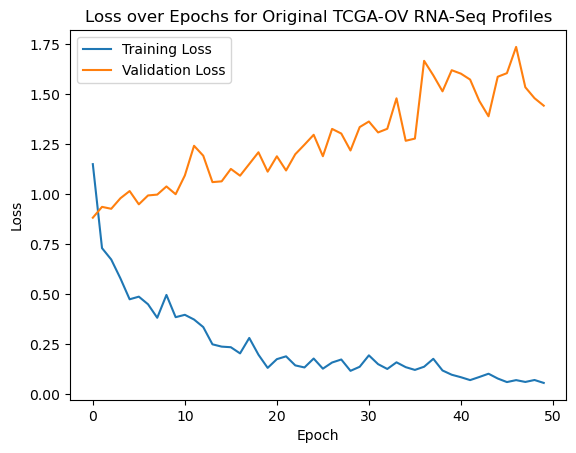

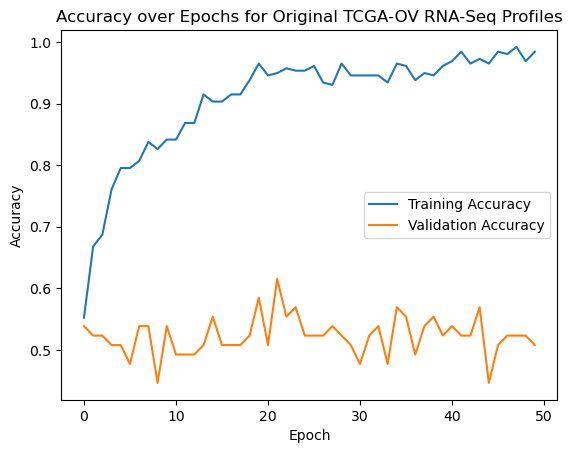

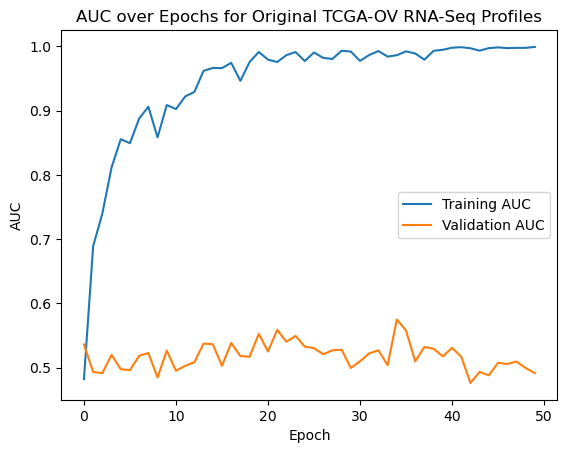

In [10]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs for Original TCGA-OV RNA-Seq Profiles')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs for Original TCGA-OV RNA-Seq Profiles')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#  AUC 
plt.plot(history.history['auc'], label='Training AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('AUC over Epochs for Original TCGA-OV RNA-Seq Profiles')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [11]:
# 32 testing
aug_32_count_path = '/Users/peytonhall/Documents/spring_2025/qbio_465/augmented_32_testing.csv'
aug_32_features = pd.read_csv(aug_32_count_path)

In [12]:
# 32 testing labels
label_32_count_path = '/Users/peytonhall/Documents/spring_2025/qbio_465/testing_labels.csv'
label_32 = pd.read_csv(label_32_count_path)

In [13]:
labels_aug = label_32.iloc[:,-1]

In [14]:
aug_32_features = aug_32_features.iloc[:,1:]

In [15]:
scaler = StandardScaler()
X_scaled_aug = scaler.fit_transform(aug_32_features)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_aug, labels_aug, test_size=0.2, random_state=42)

In [16]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # sigmoid for binary output
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', 'auc'])


/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# training history for further analysis or plotting
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_auc = history.history['auc']
val_auc = history.history['val_auc']

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.5562 - auc: 0.6028 - loss: 0.8197 - val_accuracy: 0.5385 - val_auc: 0.4250 - val_loss: 1.0833
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6136 - auc: 0.5857 - loss: 0.8523 - val_accuracy: 0.4615 - val_auc: 0.4250 - val_loss: 1.0073
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5535 - auc: 0.4768 - loss: 0.9991 - val_accuracy: 0.5385 - val_auc: 0.4625 - val_loss: 1.0003
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6162 - auc: 0.6467 - loss: 0.7453 - val_accuracy: 0.4615 - val_auc: 0.4000 - val_loss: 0.9215
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7518 - auc: 0.7696 - loss: 0.6259 - val_accuracy: 0.6154 - val_auc: 0.5625 - val_loss: 0.8509
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6814 - auc: 0.6893 - loss: 0.7605 - val_accuracy: 0.6923 - val_auc: 0.6000 - val_loss: 0.8437
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accura

In [18]:
test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8235 - auc: 0.9722 - loss: 0.3249
Test Loss: 0.3249
Test Accuracy: 0.8235
Test AUC: 0.9722


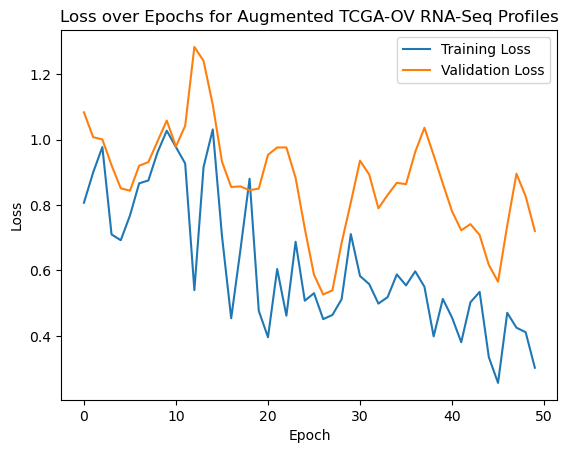

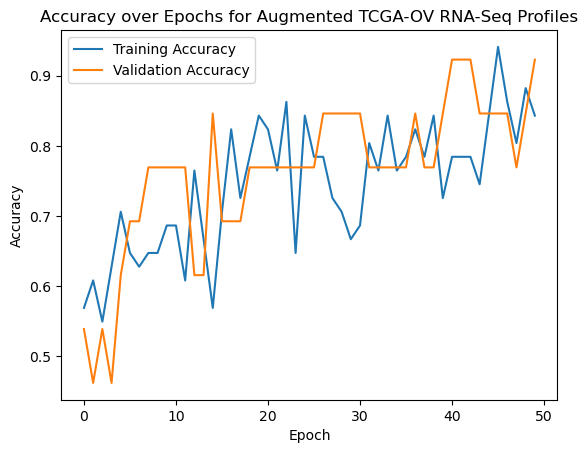

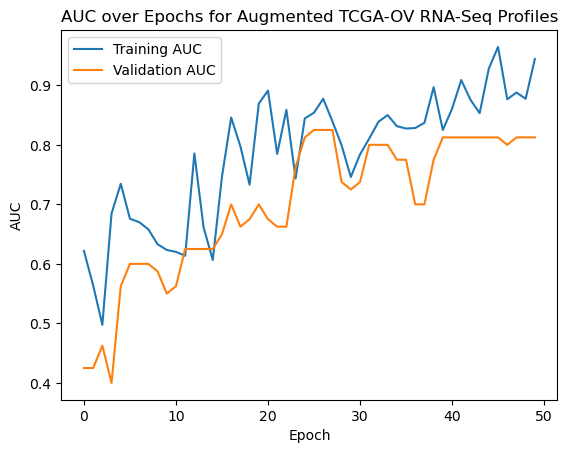

In [19]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs for Augmented TCGA-OV RNA-Seq Profiles')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs for Augmented TCGA-OV RNA-Seq Profiles')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot AUC (if you want to visualize AUC as well)
plt.plot(history.history['auc'], label='Training AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('AUC over Epochs for Augmented TCGA-OV RNA-Seq Profiles')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()